In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn import metrics

In [2]:
dataset=pd.read_csv("car_evaluation.csv")

In [3]:
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
dataset.columns=(['buy_price','maintain_cost','door','persons','luggage_boot','safety','decision'])

In [2]:
dataset=pd.read_csv("cardataset.csv")

In [6]:
dataset.to_csv('cardataset.csv')

In [8]:
data1=dataset
data1.head()

,buy_price,maintain_cost,door,persons,luggage_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
data1['buy_price'].replace({'vhigh':4,'high':3,'med':2,'low':1}, inplace=True)

In [10]:
data1['maintain_cost'].replace({'vhigh':4,'high':3,'med':2,'low':1}, inplace=True)
data1['luggage_boot'].replace({'big':3,'med':2,'small':1}, inplace=True)
data1['safety'].replace({'high':3,'med':2,'low':1}, inplace=True)
data1['decision'].replace({'unacc':0,'acc':1}, inplace=True)

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buy_price      1727 non-null   int64 
 1   maintain_cost  1727 non-null   int64 
 2   door           1727 non-null   object
 3   persons        1727 non-null   object
 4   luggage_boot   1727 non-null   int64 
 5   safety         1727 non-null   int64 
 6   decision       1727 non-null   object
dtypes: int64(4), object(3)
memory usage: 94.6+ KB


In [12]:
data1['door'].replace({'5more':6,'2':2,'3':3,'4':4}, inplace=True)
data1['persons'].replace({'more':6,'2':2,'4':4}, inplace=True)

In [13]:
data1['decision'].replace({'unacc':0,'acc':1,'good':2,'vgood':3}, inplace=True)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   buy_price      1727 non-null   int64
 1   maintain_cost  1727 non-null   int64
 2   door           1727 non-null   int64
 3   persons        1727 non-null   int64
 4   luggage_boot   1727 non-null   int64
 5   safety         1727 non-null   int64
 6   decision       1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [16]:
data1.to_csv('carpreprocess.csv')

In [17]:
data2=data1

In [18]:
data2.head()

,buy_price,maintain_cost,door,persons,luggage_boot,safety,decision
0,4,4,2,2,1,2,0
1,4,4,2,2,1,3,0
2,4,4,2,2,2,1,0
3,4,4,2,2,2,2,0
4,4,4,2,2,2,3,0


C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


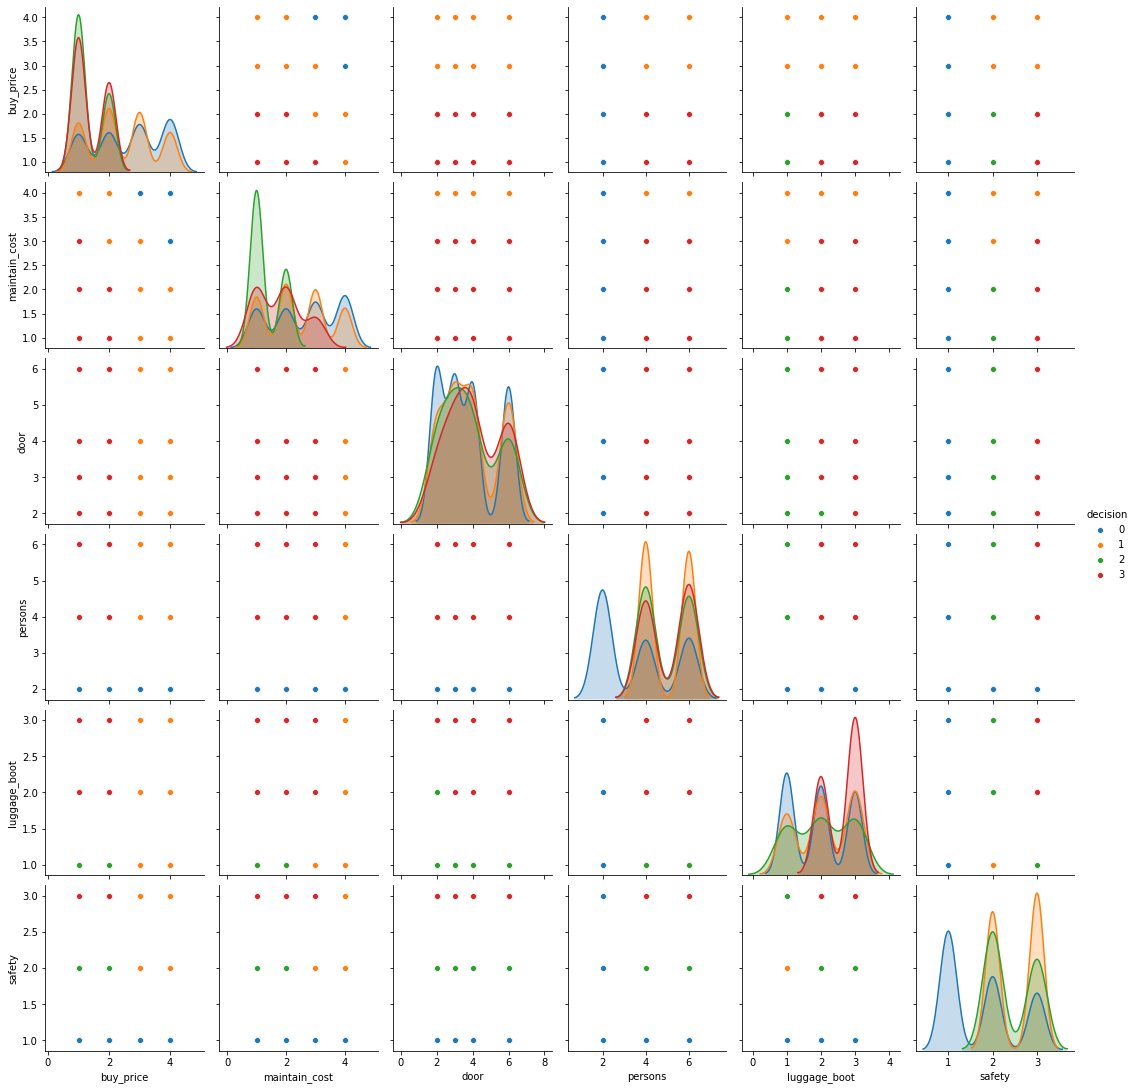

In [19]:
sns.pairplot(data2, hue='decision')
plt.show();

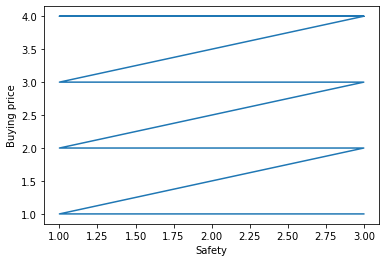

In [20]:
plt.plot(data2['safety'],data2['buy_price'])
plt.xlabel('Safety')
plt.ylabel('Buying price')
plt.show();

In [24]:
data3=data2
y=data3['decision']

In [25]:
X=data3.drop(['decision'],axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [17]:
X_test.head()

,buy_price,maintain_cost,door,persons,luggage_boot,safety
599,3,3,4,2,3,1
932,2,4,4,4,3,1
628,3,3,6,2,3,3
1497,1,3,6,4,2,2
1262,2,1,4,6,2,1


In [18]:
y_test.head()

599     0
932     0
628     0
1497    1
1262    0
Name: decision, dtype: int64

In [19]:
X_train.head()

,buy_price,maintain_cost,door,persons,luggage_boot,safety
107,4,3,2,2,1,1
900,2,4,3,4,1,2
1708,1,1,6,2,3,3
705,3,2,4,2,2,2
678,3,2,3,2,2,2


In [20]:
print(y_train)

107     0
900     0
1708    0
705     0
678     0
       ..
1130    0
1294    3
860     0
1459    0
1126    1
Name: decision, Length: 1381, dtype: int64


## Gaussian Naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nbcls=GaussianNB()

In [26]:
y_pred = nbcls.fit(X_train, y_train).predict(X_test)

In [27]:
y_pred

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 0, 3, 0, 0, 3,
       3, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0,
       0, 0, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       3, 1, 0, 3, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 3, 0, 3, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3,
       0, 3, 3, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3,

In [80]:
ypre=pd.DataFrame(data=y_pred,columns=['pred'])

In [27]:
yact=pd.DataFrame(data=y_test)

In [82]:
yact.head()

,decision
599,0
932,0
628,0
1497,1
1262,0


In [28]:
yact.index=range(0,346)

In [84]:
ypre.head()

,pred
0,0
1,0
2,3
3,0
4,0


In [98]:
yact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   decision  346 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [87]:
ytotal=pd.concat([yact,ypre],axis=1)

In [88]:
ytotal.head(300)

,decision,pred
0,0,0
1,0,0
2,0,3
3,1,0
4,0,0
...,...,...
295,3,3
296,0,0
297,0,0
298,0,0


In [96]:
confunb=confusion_matrix(ytotal['decision'],ytotal['pred'])
confunb

array([[205,   8,   0,  24],
       [ 30,  13,   5,  29],
       [  2,   0,   3,  10],
       [  0,   0,   0,  17]], dtype=int64)

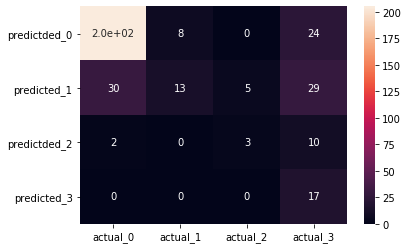

In [95]:
sns.heatmap(confunb,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();

In [100]:
accuracynb=(205+13+3+17)/346*100
accuracynb

68.78612716763006

## Decision tree classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
depths = np.linspace(1, 30, 30, endpoint=True)
print(depths)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


In [123]:
acccu=np.empty(1)
taccuracy=np.empty(1)

In [130]:
x=[]
for depth in tqdm(range(1,30)):
    dtree=DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    treepred=dtree.predict(X_test)
    y=metrics.accuracy_score(y_test, treepred)
    x.append(y)



100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 463.72it/s]


In [131]:
x

[0.684971098265896,
 0.7803468208092486,
 0.8121387283236994,
 0.861271676300578,
 0.8786127167630058,
 0.9248554913294798,
 0.9219653179190751,
 0.9566473988439307,
 0.9595375722543352,
 0.9624277456647399,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445,
 0.9653179190751445]

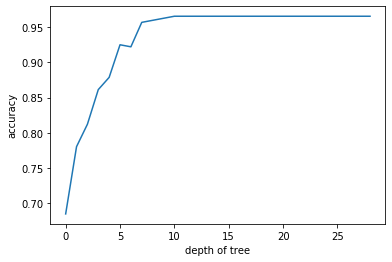

In [134]:
plt.plot(x)
plt.xlabel('depth of tree')
plt.ylabel('accuracy')
plt.show()

In [135]:
maxacu=max(x)

##  best hyper parameter for decision tree is depth =11

In [137]:
dtree=DecisionTreeClassifier(max_depth=11)
dtree.fit(X_train, y_train)
treefinalpred=dtree.predict(X_test)
acuuracy=metrics.accuracy_score(y_test, treefinalpred)

In [140]:
accuracy=y
accuracy

0.9653179190751445

In [141]:
ytreepre=pd.DataFrame(data=treefinalpred,columns=['pred'])
ytotal=pd.concat([yact,ytreepre],axis=1)
confutree=confusion_matrix(ytotal['decision'],ytotal['pred'])
confutree

array([[236,   1,   0,   0],
       [  2,  71,   2,   2],
       [  0,   2,  12,   1],
       [  0,   0,   2,  15]], dtype=int64)

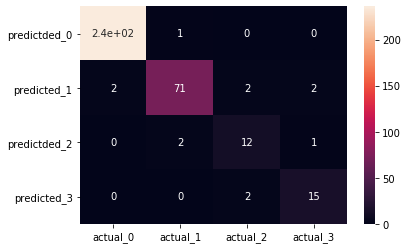

In [142]:
sns.heatmap(confutree,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();

## KNN classifier

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
accuracies=[]
for i in tqdm(range(1,30)):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knnpre=knn.predict(X_test)
    y=metrics.accuracy_score(y_test,knnpre)
    accuracies.append(y)



  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

 28%|██████████████████████▉                                                            | 8/29 [00:00<00:00, 73.18it/s]

 52%|██████████████████████████████████████████▍                                       | 15/29 [00:00<00:00, 69.98it/s]

 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:00<00:00, 67.98it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 62.80it/s]


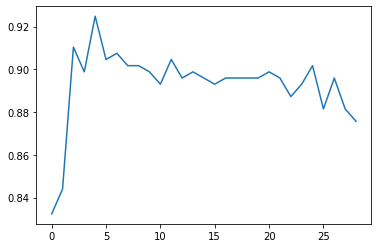

In [149]:
plt.plot(accuracies)
plt.xlabel=('Nearest neighbours')
plt.ylabel=('Accuracy')
plt.show();

In [152]:
maxacknn=max(accuracies)
maxacknn

0.9248554913294798

In [159]:
accuracies

[0.8323699421965318,
 0.8439306358381503,
 0.9104046242774566,
 0.8988439306358381,
 0.9248554913294798,
 0.9046242774566474,
 0.9075144508670521,
 0.9017341040462428,
 0.9017341040462428,
 0.8988439306358381,
 0.8930635838150289,
 0.9046242774566474,
 0.8959537572254336,
 0.8988439306358381,
 0.8959537572254336,
 0.8930635838150289,
 0.8959537572254336,
 0.8959537572254336,
 0.8959537572254336,
 0.8959537572254336,
 0.8988439306358381,
 0.8959537572254336,
 0.8872832369942196,
 0.8930635838150289,
 0.9017341040462428,
 0.8815028901734104,
 0.8959537572254336,
 0.8815028901734104,
 0.8757225433526011]

In [163]:
bestknn=KNeighborsClassifier(n_neighbors=5)
yknnpred=bestknn.fit(X_train,y_train).predict(X_test)

In [164]:
yknnpred=pd.DataFrame(data=yknnpred,columns=['pred'])
ytotal=pd.concat([yact,yknnpred],axis=1)
confuknn=confusion_matrix(ytotal['decision'],ytotal['pred'])
confuknn

array([[234,   3,   0,   0],
       [  3,  74,   0,   0],
       [  0,   9,   5,   1],
       [  0,   8,   2,   7]], dtype=int64)

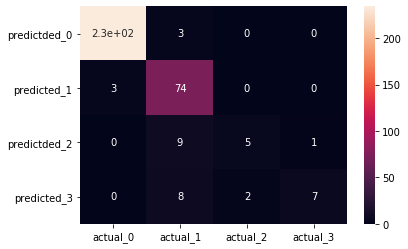

In [170]:
sns.heatmap(confuknn,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();

## Neural network classifier

In [168]:
from sklearn.neural_network import MLPClassifier

In [179]:
neuaccu=[]
layers=[50,100,500,1000,10000]
for i in tqdm(layers):
    neural=MLPClassifier(hidden_layer_sizes=(100,i))
    neupred=neural.fit(X_train,y_train).predict(X_test)
    d=metrics.accuracy_score(y_test,neupred)
    neuaccu.append(d)



  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 20%|████████████████▊                                                                   | 1/5 [00:02<00:09,  2.30s/it]C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 40%|█████████████████████████████████▌                                                  | 2/5 [00:05<00:07,  2.44s/it]C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic O

In [180]:
neuaccu

[0.9421965317919075,
 0.9595375722543352,
 0.9710982658959537,
 0.9710982658959537,
 0.9710982658959537]

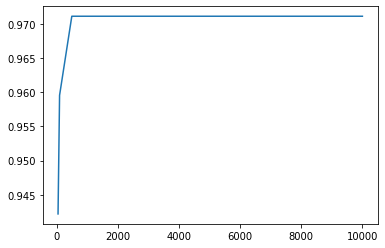

In [181]:
plt.plot(layers,neuaccu)
xlabel=('layers')
ylabel=('accuracies')
plt.show();

In [188]:
finalneural=MLPClassifier(hidden_layer_sizes=(100,1000))
neupred=fianlneural.fit(X_train,y_train).predict(X_test)

NameError: name 'fianlneural' is not defined

In [182]:
yneupred=pd.DataFrame(data=neupred,columns=['pred'])
ytotal=pd.concat([yact,yneupred],axis=1)
confuneu=confusion_matrix(ytotal['decision'],ytotal['pred'])
confuneu

array([[237,   0,   0,   0],
       [  0,  72,   4,   1],
       [  0,   1,  11,   3],
       [  0,   1,   0,  16]], dtype=int64)

In [191]:
neuaccuracy=metrics.accuracy_score(y_test,neupred)
neuaccuracy

0.9710982658959537

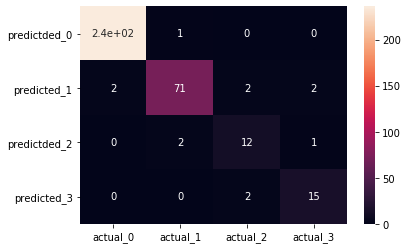

In [192]:
sns.heatmap(confutree,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();